In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base=automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session=Session(bind=engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date=session.query(Measurement).order_by(Measurement.date.desc()).first().date
recent_date

'2017-08-23'

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
recent_date=dt.datetime.strptime(recent_date,"%Y-%m-%d")
oneyearbefore=recent_date.replace(year=recent_date.year-1)
oyb_year=oneyearbefore.strftime("%Y-%m-%d")
oyb_year

'2016-08-23'

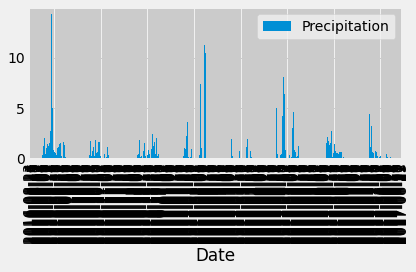

In [11]:
# Perform a query to retrieve the date and precipitation scores
scores=session.query(Measurement.date,func.sum(Measurement.prcp)).group_by(Measurement.date).filter(Measurement.date>=oyb_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df=pd.DataFrame(scores,columns=["Date","Precipitation"])
df=df.set_index("Date")

# Sort the dataframe by date
df=df.sort_values(by="Date",ascending=True)
df
# Use Pandas Plotting with Matplotlib to plot the data
df.plot.bar()
plt.tight_layout()
plt.show()

In [12]:
scores

[('2016-08-23', 2.71),
 ('2016-08-24', 9.329999999999998),
 ('2016-08-25', 0.54),
 ('2016-08-26', 0.09999999999999999),
 ('2016-08-27', 0.31999999999999995),
 ('2016-08-28', 3.0999999999999996),
 ('2016-08-29', 1.46),
 ('2016-08-30', 0.07),
 ('2016-08-31', 3.1799999999999997),
 ('2016-09-01', 0.03),
 ('2016-09-02', 0.25),
 ('2016-09-03', 1.27),
 ('2016-09-04', 1.3800000000000001),
 ('2016-09-05', 0.33999999999999997),
 ('2016-09-06', 1.23),
 ('2016-09-07', 2.0),
 ('2016-09-08', 0.4600000000000001),
 ('2016-09-09', 1.0699999999999998),
 ('2016-09-10', 1.4),
 ('2016-09-11', 1.25),
 ('2016-09-12', 1.54),
 ('2016-09-13', 2.71),
 ('2016-09-14', 14.280000000000001),
 ('2016-09-15', 4.96),
 ('2016-09-16', 0.8200000000000001),
 ('2016-09-17', 0.6799999999999999),
 ('2016-09-18', 0.53),
 ('2016-09-19', 0.32),
 ('2016-09-20', 1.03),
 ('2016-09-21', 1.17),
 ('2016-09-22', 1.44),
 ('2016-09-23', 1.57),
 ('2016-09-24', 0.28),
 ('2016-09-25', 0.09),
 ('2016-09-26', 1.67),
 ('2016-09-27', 1.359999999

In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,Precipitation
count,366.000000
mean,0.978907
std,1.776349
min,0.000000
25%,0.052500
50%,0.405000
75%,1.087500
max,14.280000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset
station_count=session.query(Measurement).group_by(Measurement.station).count()
station_count

9

In [19]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_frec=session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
station_frec

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sub=[func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)]
(min_temp,max_temp,avg_temp)=session.query(*sub).filter_by(station=station_frec[0][0]).one()
print(f"Station: {station_frec[0][0]}\nMinimum Temperature: {min_temp}\nMaximum Temperature: {max_temp}\nAverage Temperature: {avg_temp}")

Station: USC00519281
Minimum Temperature: 54.0
Maximum Temperature: 85.0
Average Temperature: 71.66378066378067


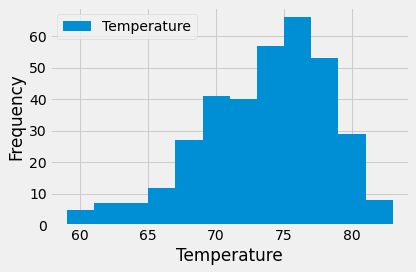

In [21]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
histogram_data=session.query(Measurement.date,Measurement.tobs).filter(Measurement.date>=oyb_year).filter(Measurement.station==station_frec[0][0]).order_by(Measurement.date).all()
histogram_df=pd.DataFrame(histogram_data,columns=["Date","Temperature"])
histogram_df=histogram_df.set_index("Date")
histogram_df.plot(kind="hist",bins=12)
plt.xlabel("Temperature")
plt.tight_layout()
plt.show()

# Close session

In [18]:
# Close Session
session.close()